In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from src.experiments import compare_guarantees_experiment
from src.experiments import bargaining_gap_experiment

# settings

In [2]:
NUMBER_OF_EXPERIMENTS = 100
PRECISION = 10 # 6 decimal places

In [3]:
def calc_raios(data, metric_cols, all_cols, group_cols):
    ratios = pd.DataFrame()
    for g in metric_cols:
        for gd in all_cols:
            if g == gd:
                continue

            ratios[f'{g}/{gd}'] = data[g]/data[gd]
    
    for gc in group_cols:
        ratios[gc] = data[gc]

    return ratios

# 1. Comparing guarantees

In [4]:
cg_exp = compare_guarantees_experiment.CompareGuaranteeExperiment()
cg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
cg_exp.columns

{'dc_gr',
 'familiar_share_gr',
 'goods_num',
 'max_min_gr',
 'min_max_gr',
 'sb_gr',
 'utility_type'}

In [5]:
data = cg_exp.load_experiment()

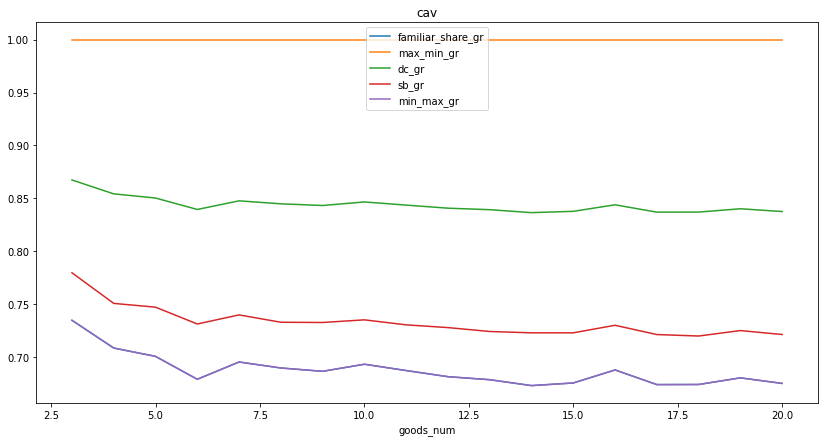

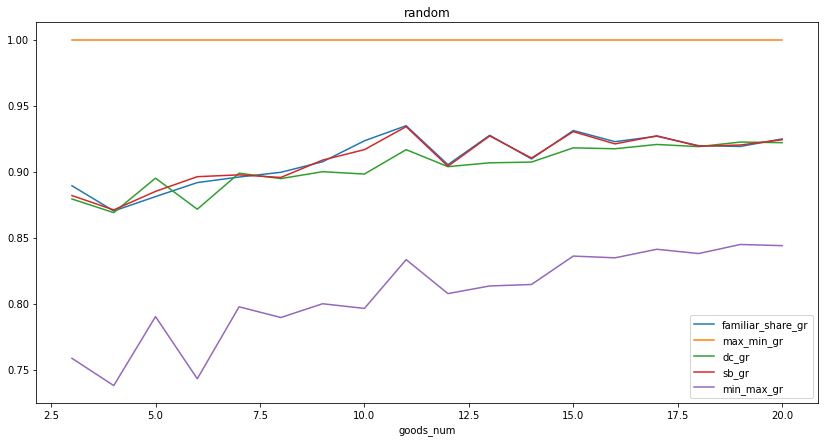

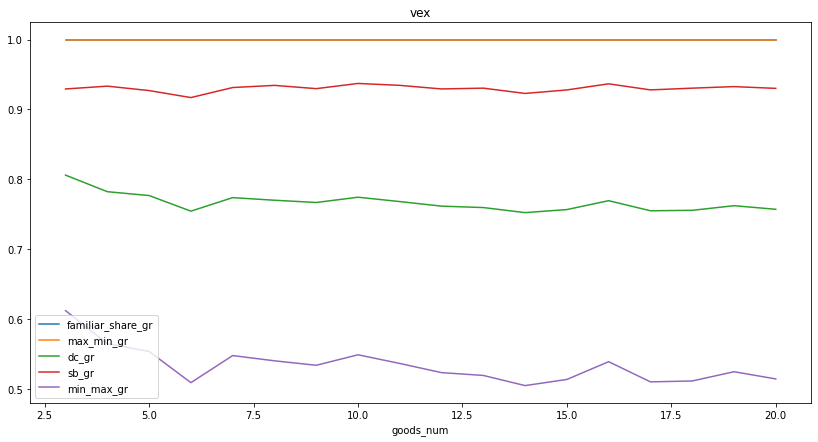

In [6]:
r_data = data.groupby(['utility_type', 'goods_num']).mean()
for i in r_data.index.unique('utility_type'):
    r_data.loc[i].plot(figsize=(14, 7), title=i, style='-')

as seen from the graph all guarantees values lies beetween min_max and max_min guarantees. </br>
now i will try to find experiment where this condition violates

In [7]:
guarantees_columns = [
    'dc_gr',
    'familiar_share_gr',
    'max_min_gr',
    'min_max_gr',
    'sb_gr',
]

data[data['min_max_gr'].round(PRECISION) > data[guarantees_columns].min(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [familiar_share_gr, utility_type, max_min_gr, dc_gr, goods_num, sb_gr, min_max_gr]
Index: []

In [8]:
data[data['max_min_gr'].round(PRECISION) < data[guarantees_columns].max(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [familiar_share_gr, utility_type, max_min_gr, dc_gr, goods_num, sb_gr, min_max_gr]
Index: []

Looks like there is no violation for used prcision (10 decimal digits)

### Calculate ratios statistics

In [9]:
ratios = calc_raios(data, ('dc_gr','familiar_share_gr', 'sb_gr'), guarantees_columns, ['utility_type', 'goods_num'])

Ratios mean

In [10]:
ratios.groupby(['utility_type', 'goods_num']).mean()

dc_gr/familiar_share_gr  dc_gr/max_min_gr  \
utility_type goods_num                                              
cav          3                         1.194031          0.867416   
             4                         1.217726          0.854298   
             5                         1.223250          0.850366   
             6                         1.245591          0.839542   
             7                         1.226210          0.847702   
             8                         1.229961          0.844877   
             9                         1.233167          0.843297   
             10                        1.225643          0.846642   
             11                        1.231862          0.843663   
             12                        1.238421          0.840762   
             13                        1.240444          0.839337   
             14                        1.247709          0.836553   
             15                        1.243301          0.837791   
             16                        1.230592          0.843950   
             17                        1.245042          0.837031   
             18                        1.244393          0.837073   
             19                        1.237780          0.840209   
             20                        1.242924          0.837585   
random       3                         1.011373          0.879299   
             4                         1.022633          0.868964   
             5                         1.031369          0.895099   
             6                         0.994193          0.871548   
             7                         1.017571          0.898812   
             8                         1.007244          0.894751   
             9                         1.001900          0.899971   
             10                        0.981193          0.898198   
             11                        0.985369          0.916671   
             12                        1.006553          0.903808   
             13                        0.984819          0.906709   
             14                        1.005381          0.907268   
             15                        0.991583          0.918026   
             16                        0.999263          0.917366   
             17                        0.998074          0.920604   
             18                        1.004875          0.918981   
             19                        1.010089          0.922419   
             20                        1.001724          0.921978   
vex          3                         0.805969          0.805969   
             4                         0.782274          0.782274   
             5                         0.776750          0.776750   
             6                         0.754409          0.754409   
             7                         0.773790          0.773790   
             8                         0.770039          0.770039   
             9                         0.766833          0.766833   
             10                        0.774357          0.774357   
             11                        0.768138          0.768138   
             12                        0.761579          0.761579   
             13                        0.759556          0.759556   
             14                        0.752291          0.752291   
             15                        0.756699          0.756699   
             16                        0.769408          0.769408   
             17                        0.754958          0.754958   
             18                        0.755607          0.755607   
             19                        0.762220          0.762220   
             20                        0.757076          0.757076   

                        dc_gr/min_max_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  1.194031     

Ratios variance

In [11]:
ratios.groupby(['utility_type', 'goods_num']).var()

dc_gr/familiar_share_gr  dc_gr/max_min_gr  \
utility_type goods_num                                              
cav          3                         0.009724          0.002698   
             4                         0.009202          0.002095   
             5                         0.007136          0.001691   
             6                         0.006933          0.001498   
             7                         0.005446          0.001192   
             8                         0.003824          0.000825   
             9                         0.003646          0.000812   
             10                        0.003274          0.000745   
             11                        0.003317          0.000714   
             12                        0.003494          0.000780   
             13                        0.002820          0.000579   
             14                        0.003745          0.000744   
             15                        0.002364          0.000509   
             16                        0.002762          0.000617   
             17                        0.002460          0.000509   
             18                        0.002030          0.000424   
             19                        0.002182          0.000471   
             20                        0.001802          0.000366   
random       3                         0.031714          0.008452   
             4                         0.030246          0.005629   
             5                         0.017154          0.003228   
             6                         0.021667          0.003645   
             7                         0.015280          0.002139   
             8                         0.014404          0.002421   
             9                         0.012472          0.002255   
             10                        0.010949          0.001902   
             11                        0.006109          0.001426   
             12                        0.009319          0.001350   
             13                        0.009047          0.001619   
             14                        0.009033          0.001283   
             15                        0.007587          0.001717   
             16                        0.005836          0.000941   
             17                        0.005893          0.001254   
             18                        0.006473          0.000893   
             19                        0.006516          0.000805   
             20                        0.005634          0.000769   
vex          3                         0.009724          0.009724   
             4                         0.009202          0.009202   
             5                         0.007136          0.007136   
             6                         0.006933          0.006933   
             7                         0.005446          0.005446   
             8                         0.003824          0.003824   
             9                         0.003646          0.003646   
             10                        0.003274          0.003274   
             11                        0.003317          0.003317   
             12                        0.003494          0.003494   
             13                        0.002820          0.002820   
             14                        0.003745          0.003745   
             15                        0.002364          0.002364   
             16                        0.002762          0.002762   
             17                        0.002460          0.002460   
             18                        0.002030          0.002030   
             19                        0.002182          0.002182   
             20                        0.001802          0.001802   

                        dc_gr/min_max_gr  dc_gr/sb_gr  \
utility_type goods_num                                  
cav          3                  0.009724     

# 2. Bargaining gap same pairs

In [12]:
bg_exp = bargaining_gap_experiment.BargainingGapExperiment()
bg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
bg_exp.columns

{'dc_gr_sum',
 'familiar_share_gr_sum',
 'goods_num',
 'max',
 'min',
 'mix_param',
 'sb_gr_sum',
 'scale_param',
 'utility_type'}

In [14]:
bg_group_cols = {'utility_type', 'goods_num', 'mix_param', 'scale_param'}
bg_data = bg_exp.load_experiment()

/Users/kirill-adayev/HSE/fair_division_with_money/venv/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


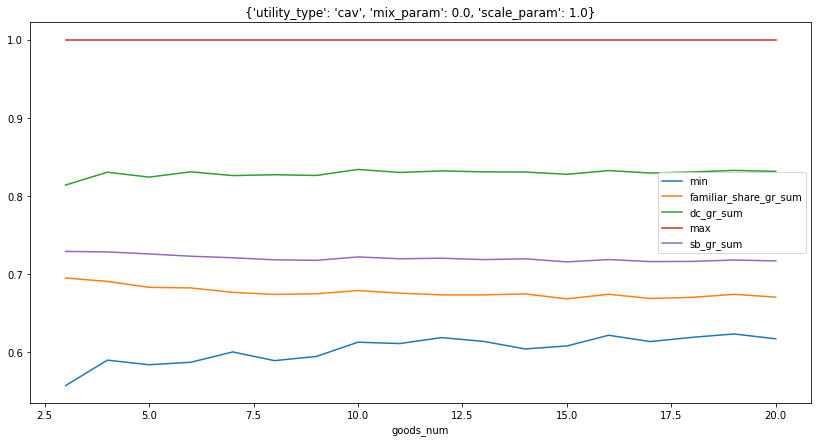

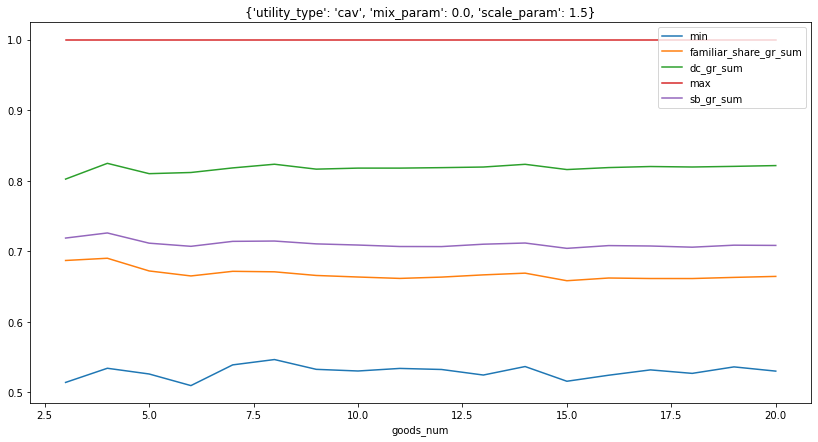

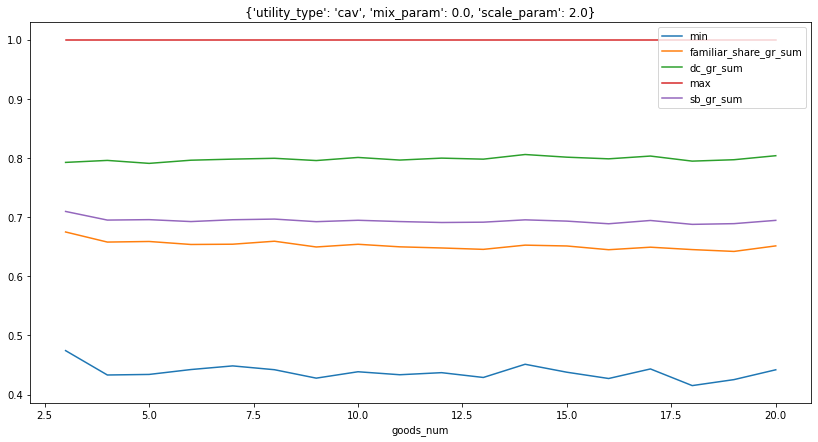

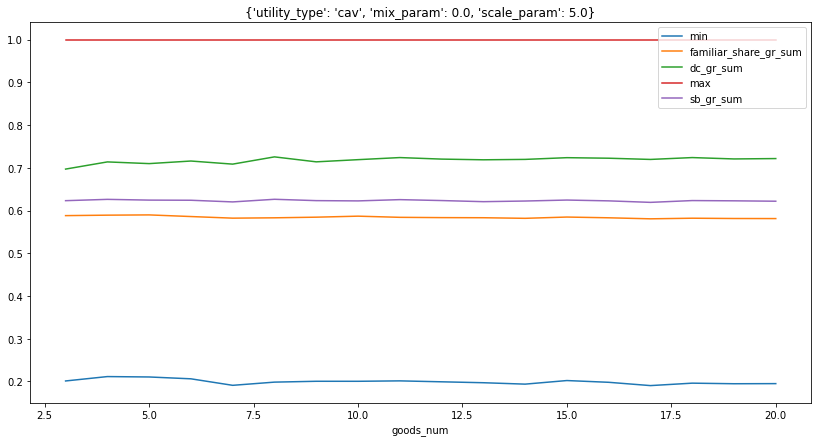

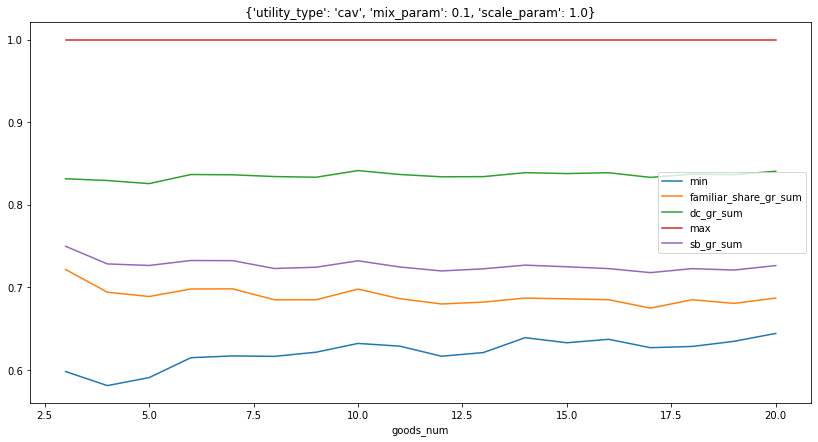

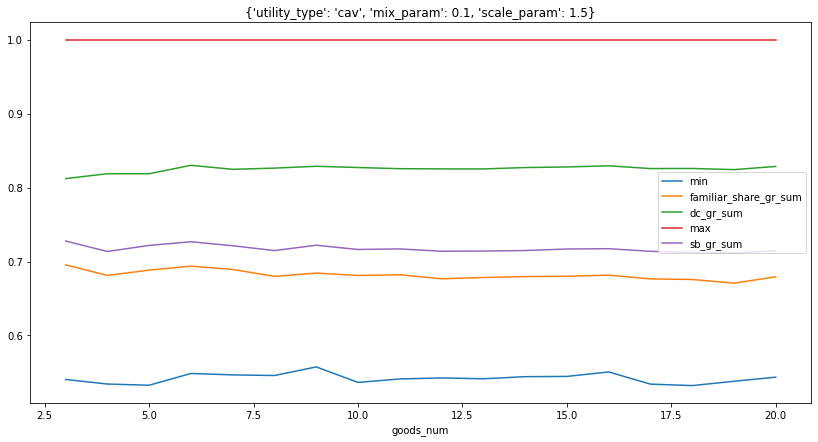

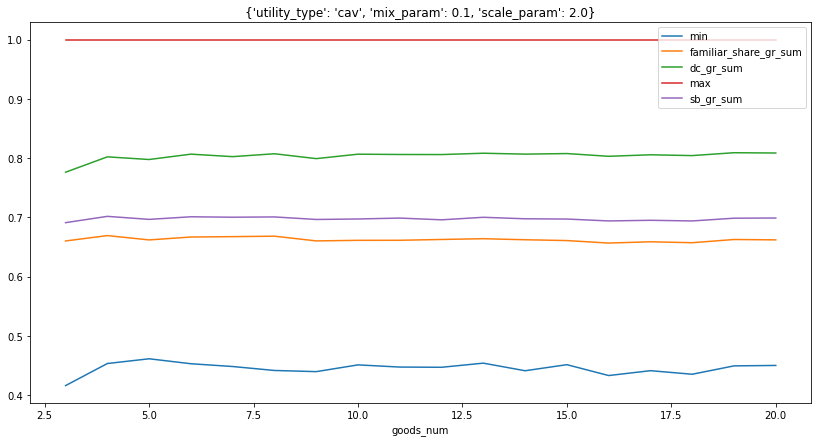

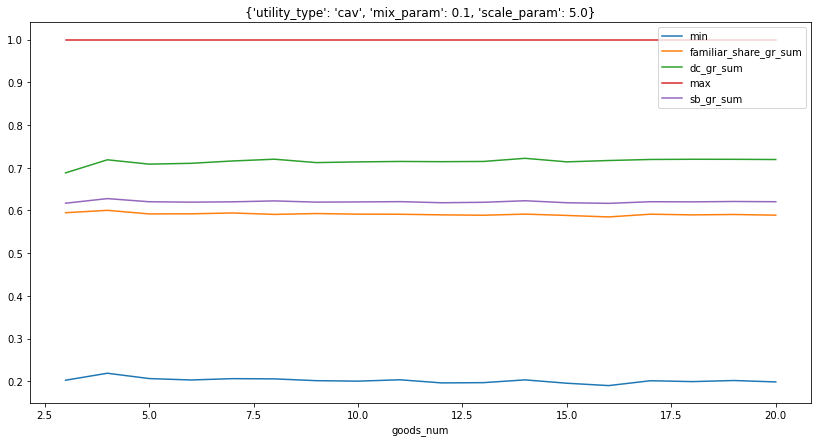

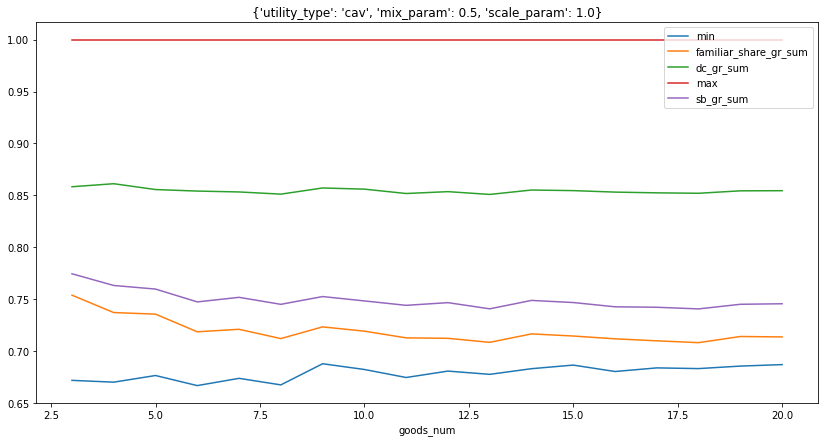

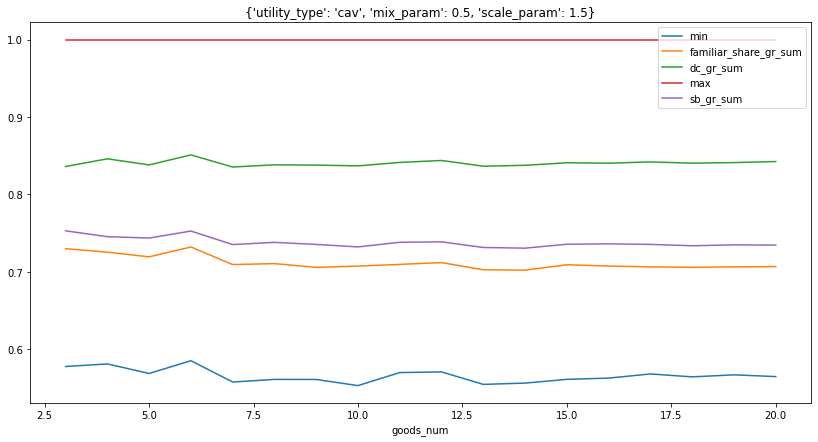

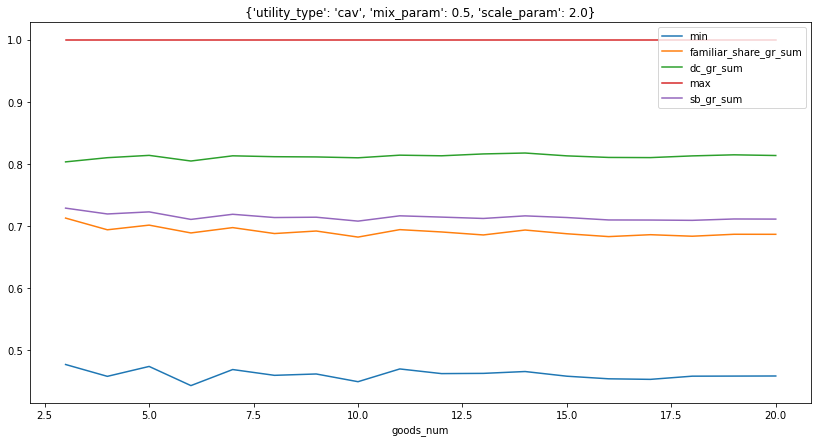

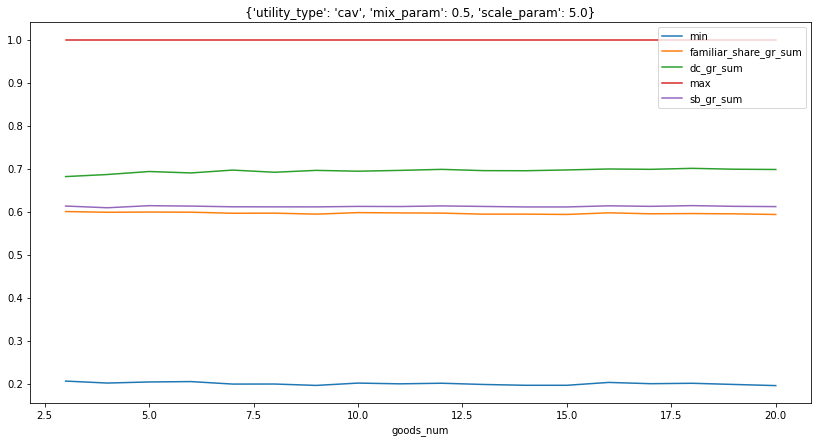

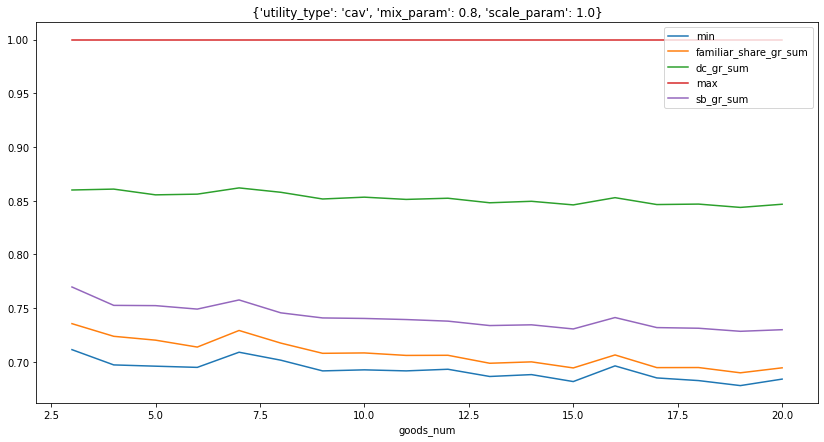

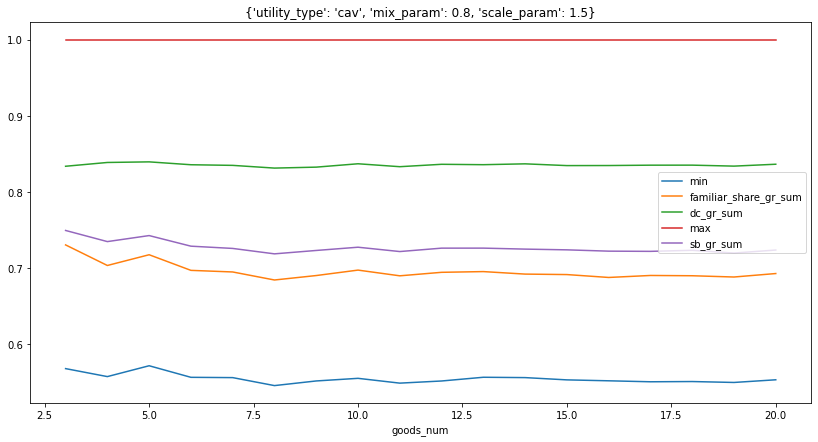

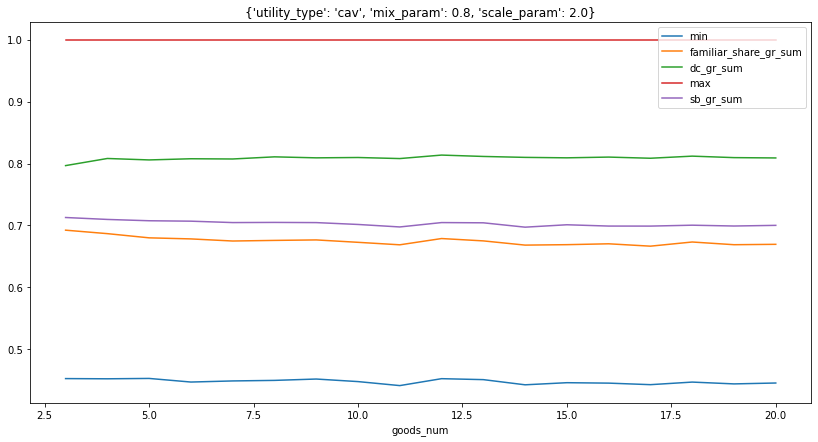

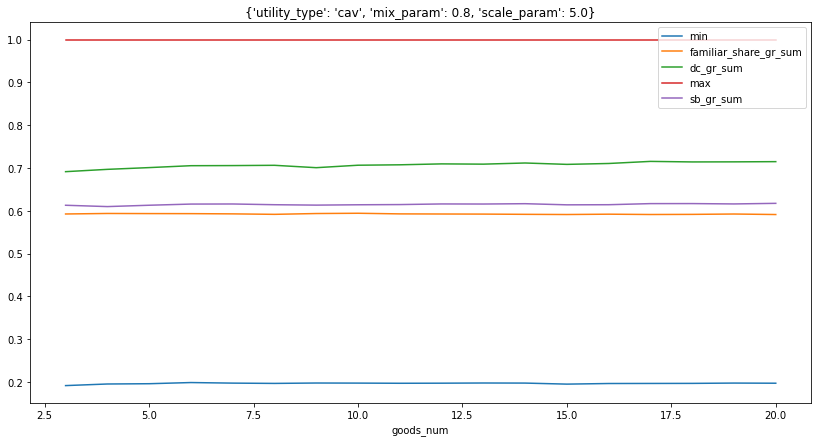

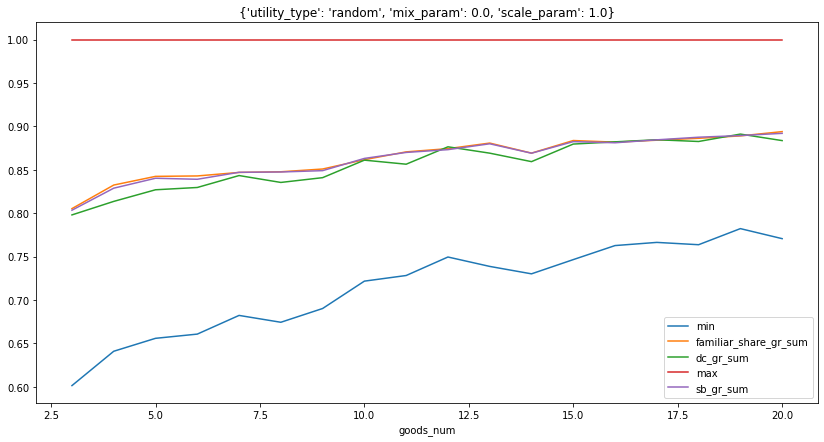

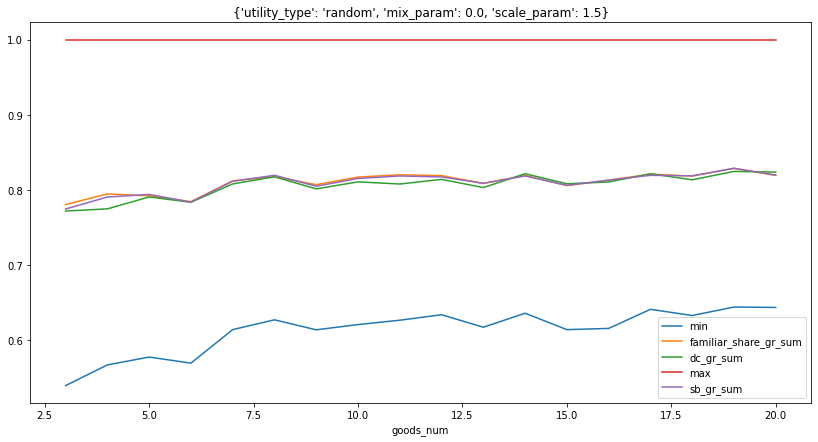

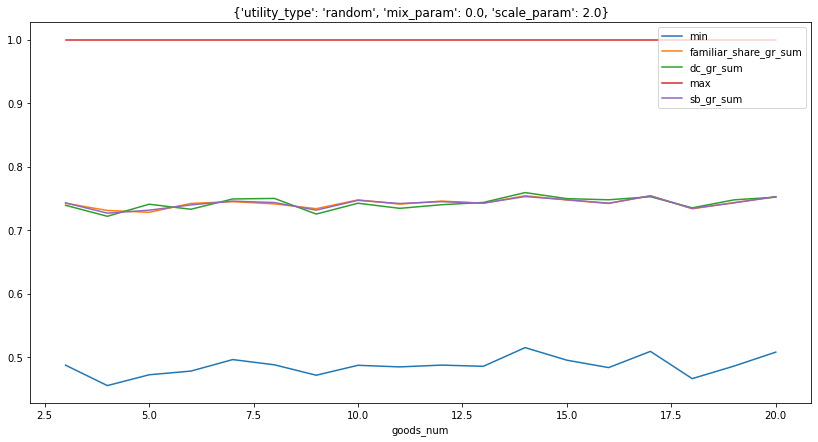

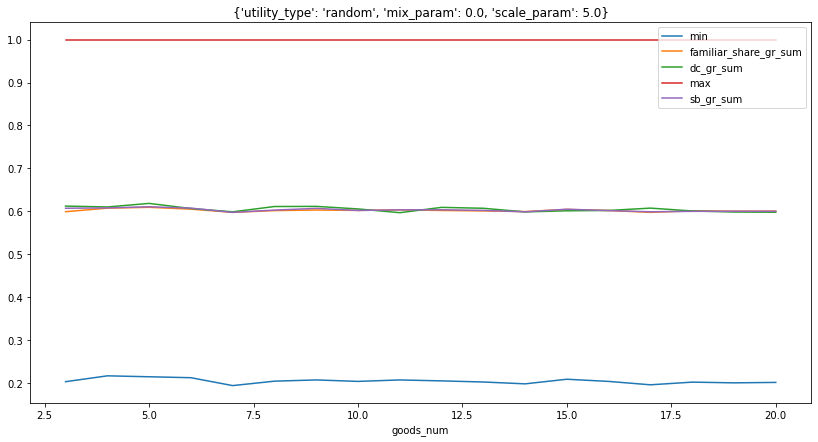

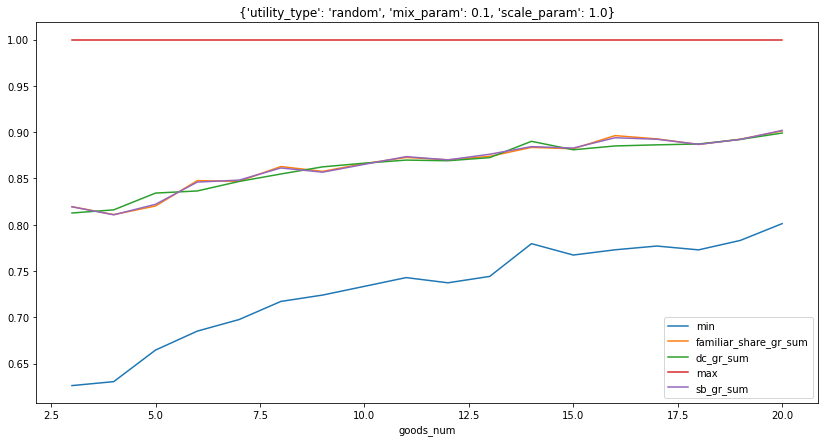

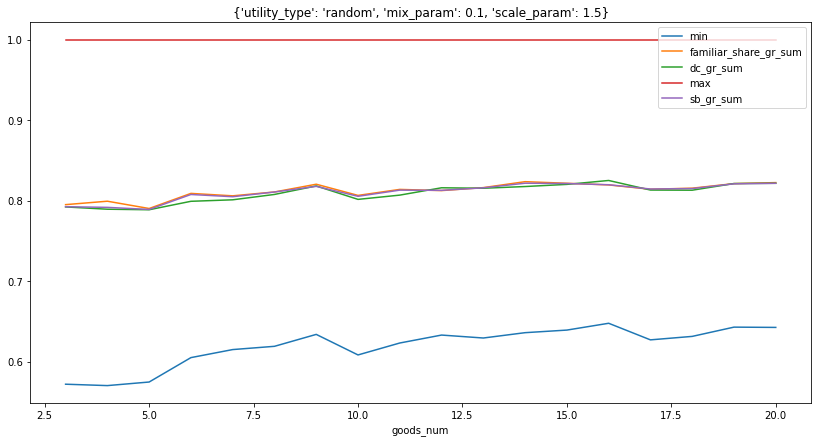

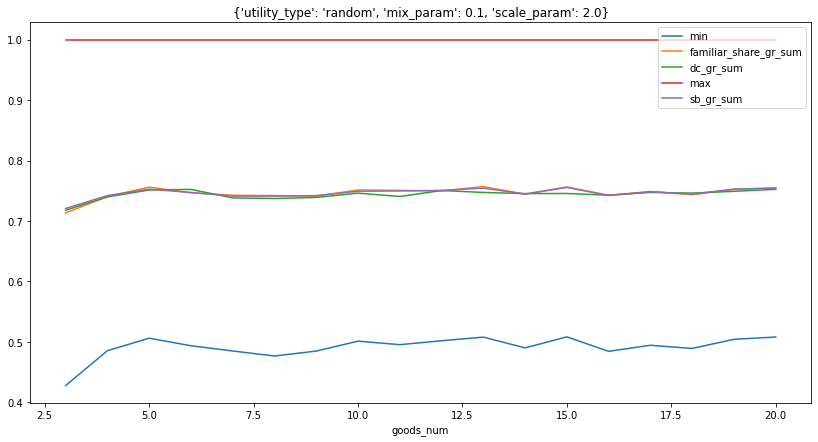

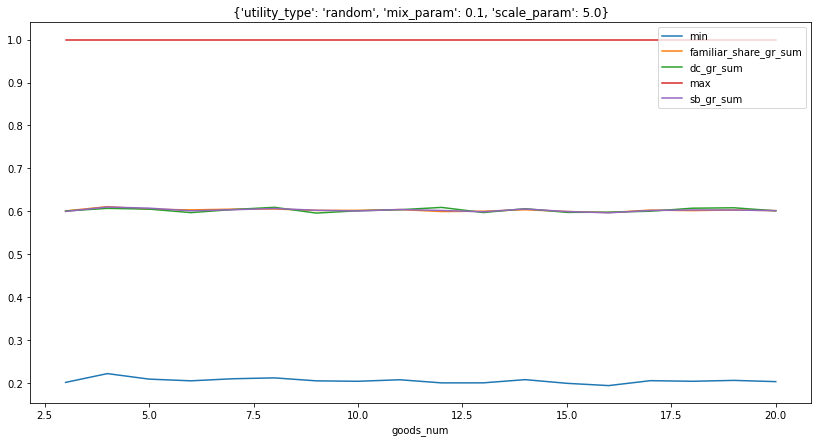

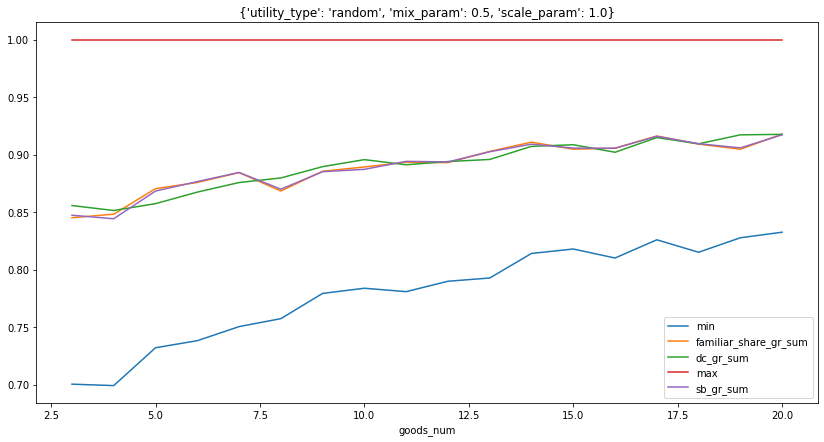

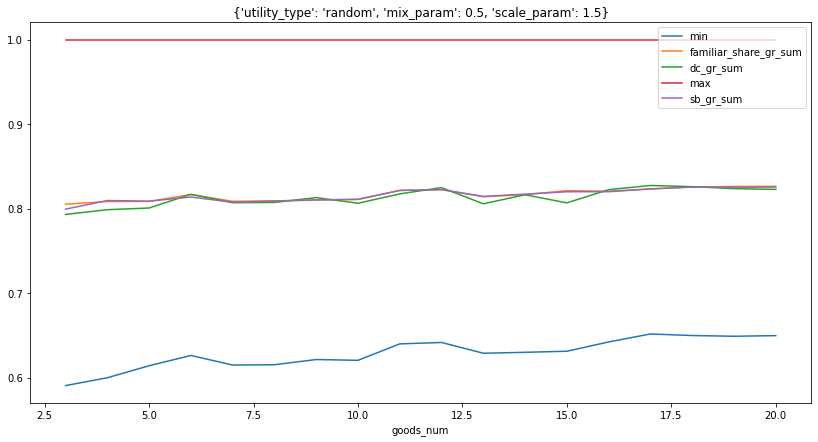

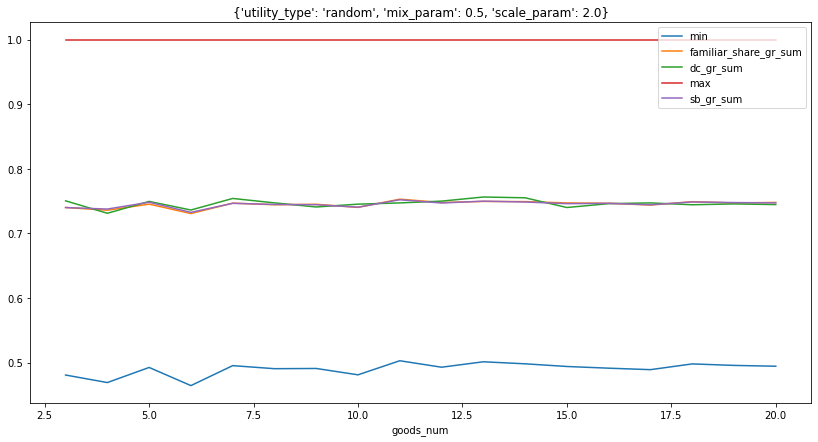

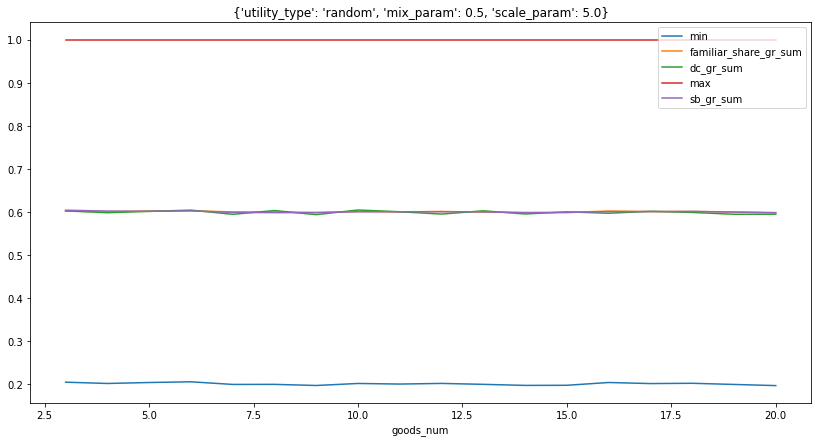

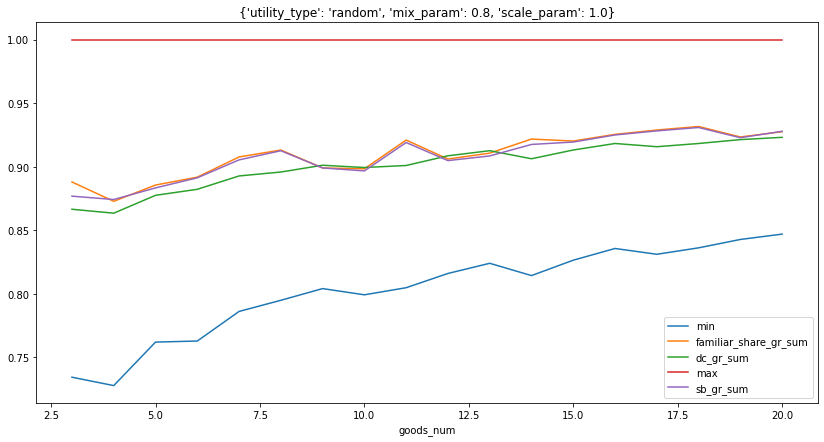

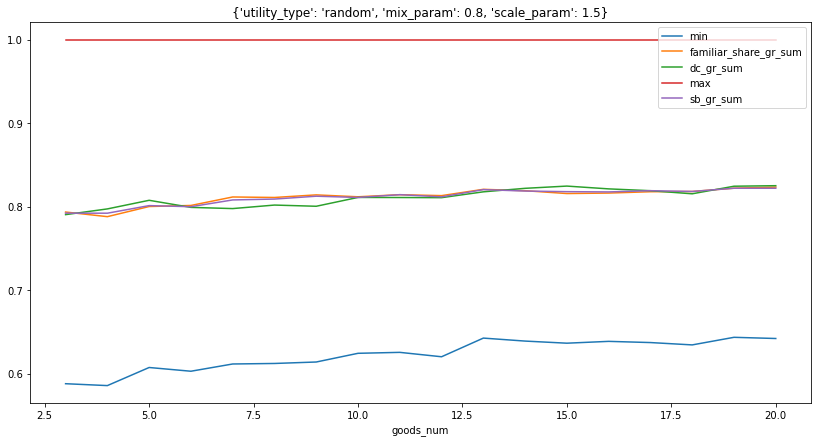

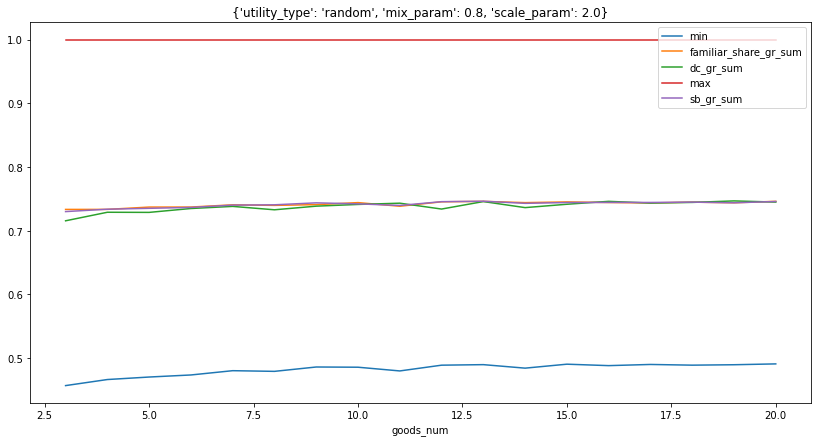

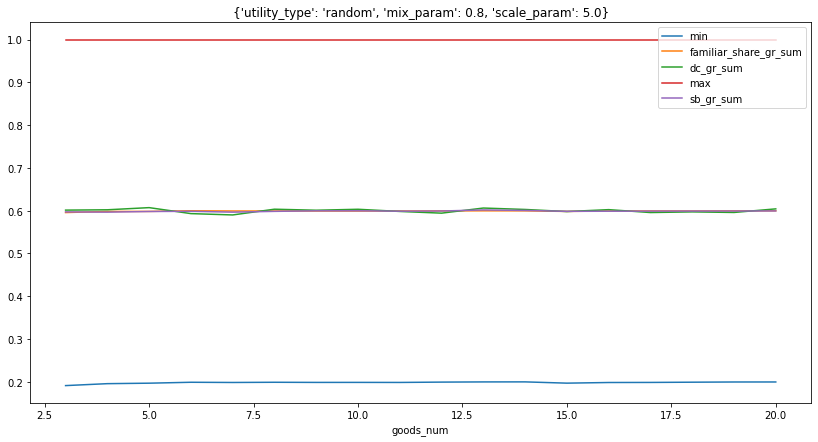

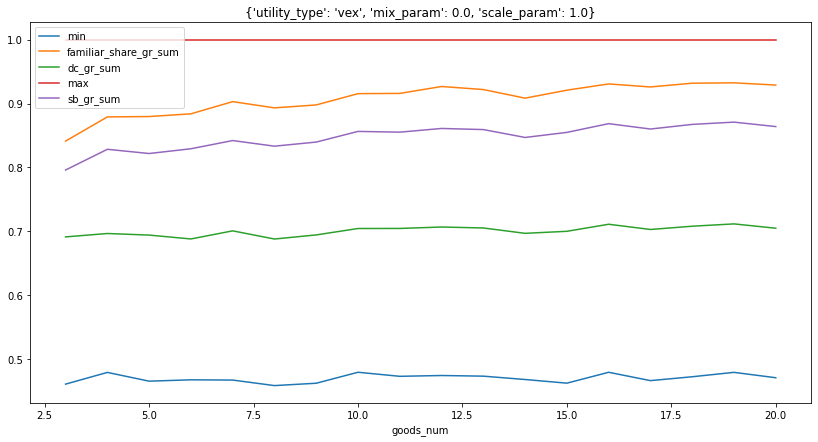

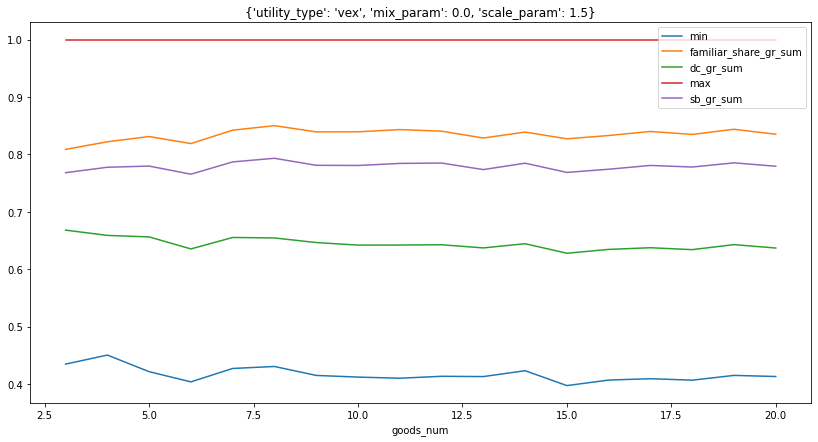

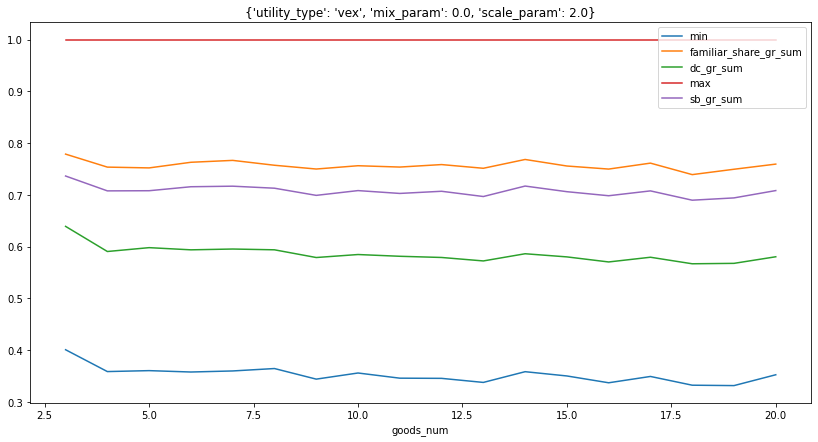

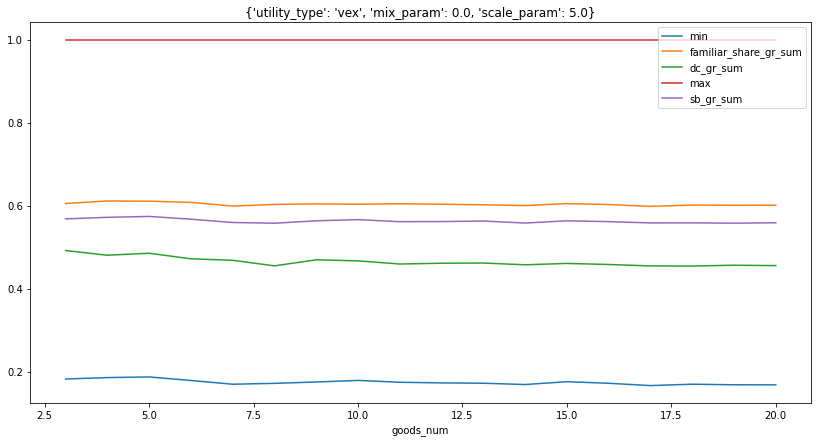

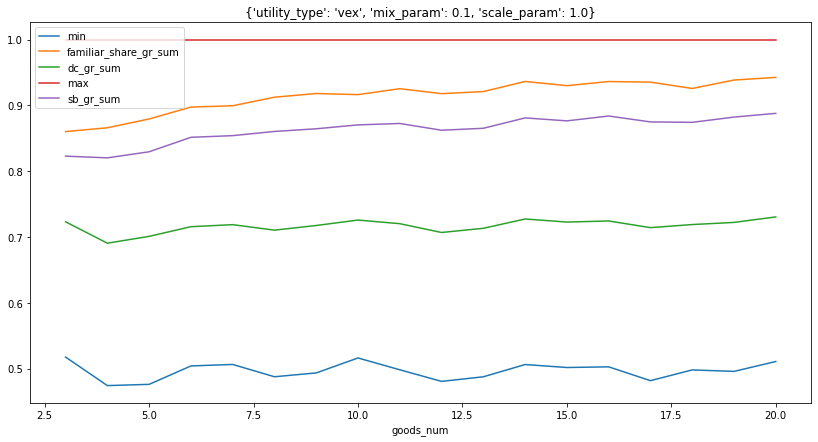

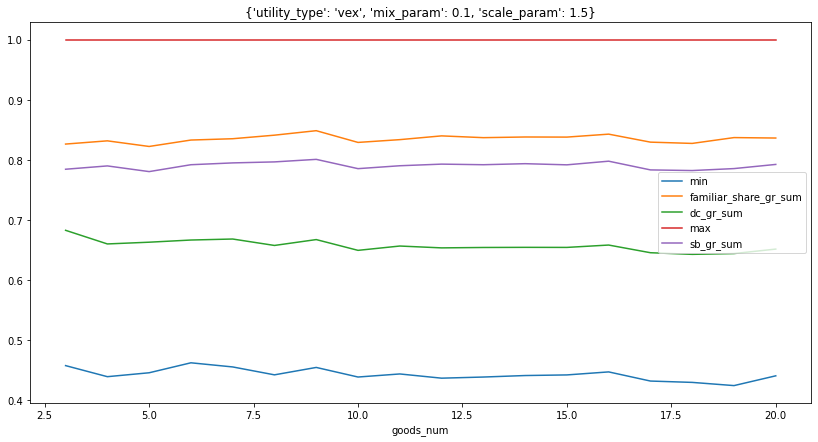

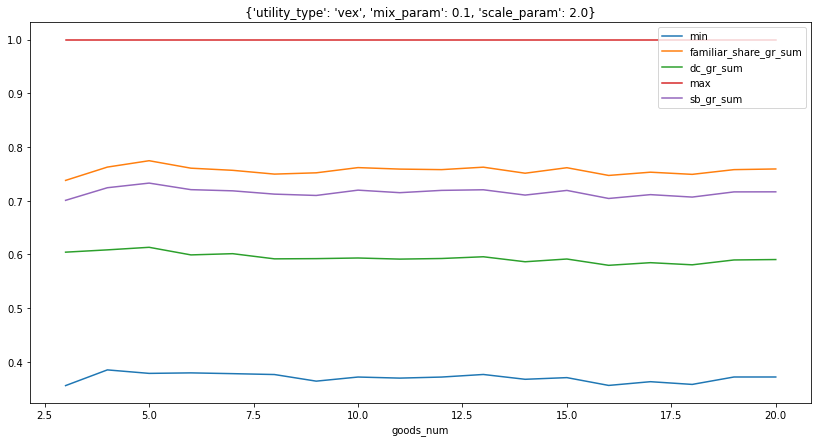

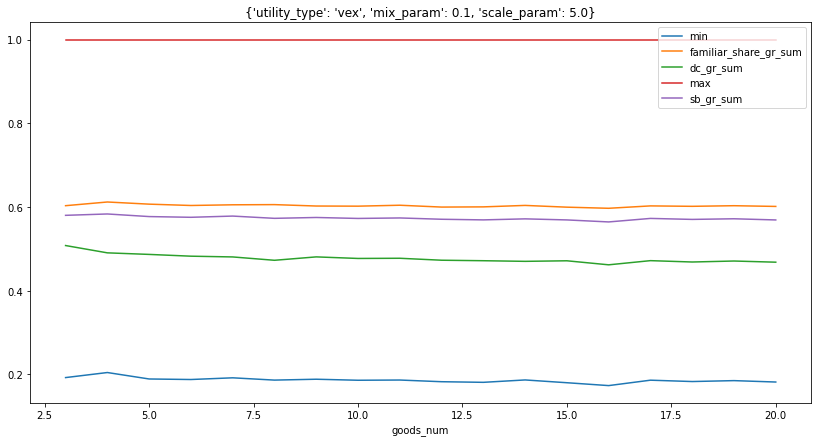

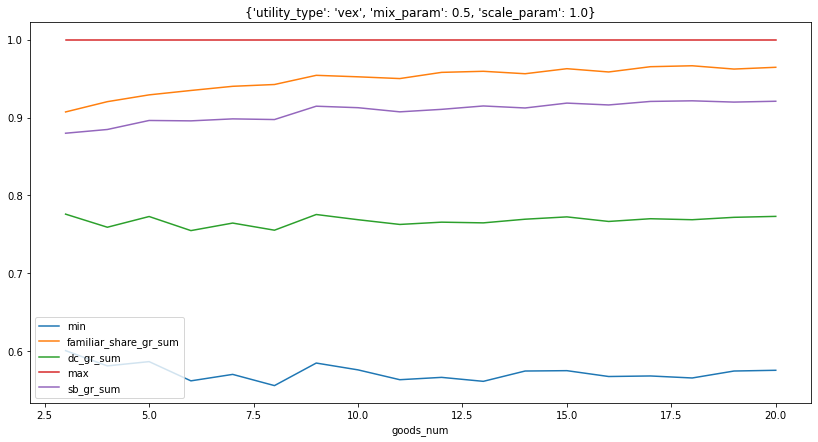

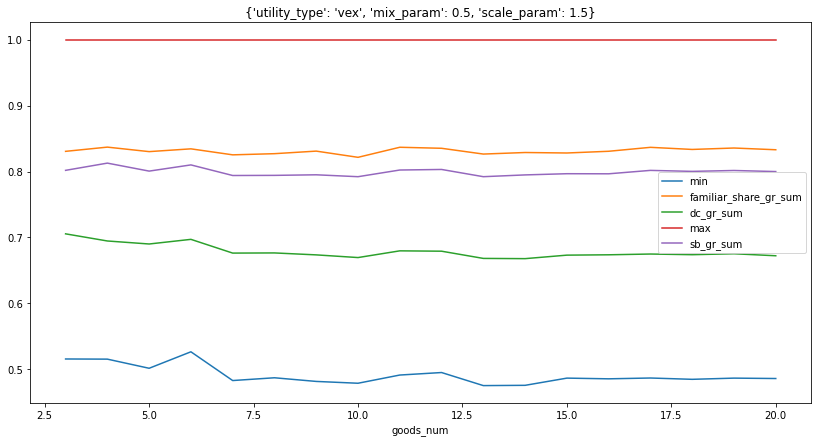

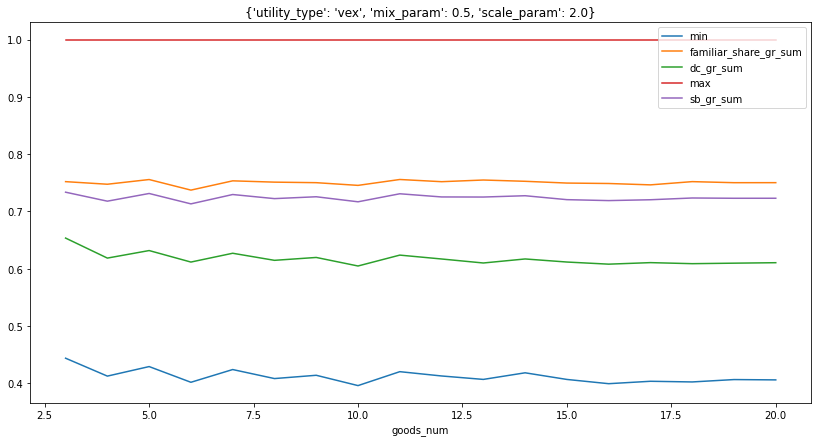

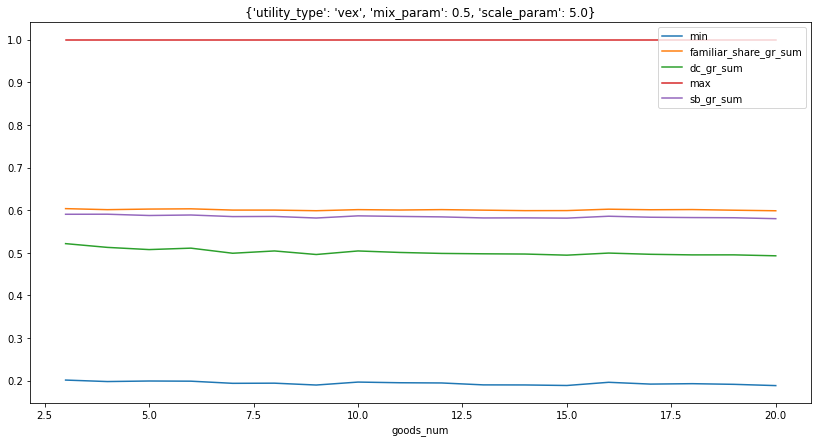

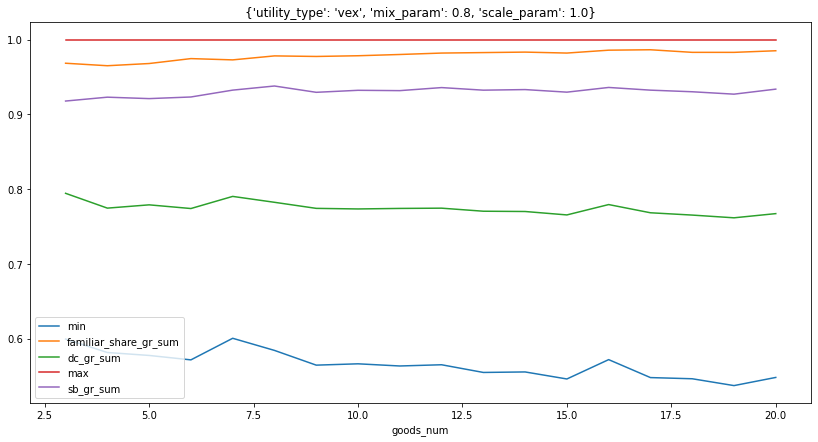

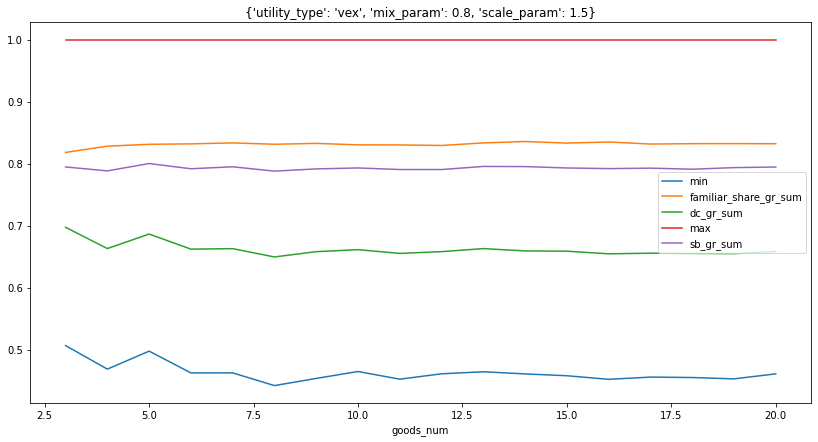

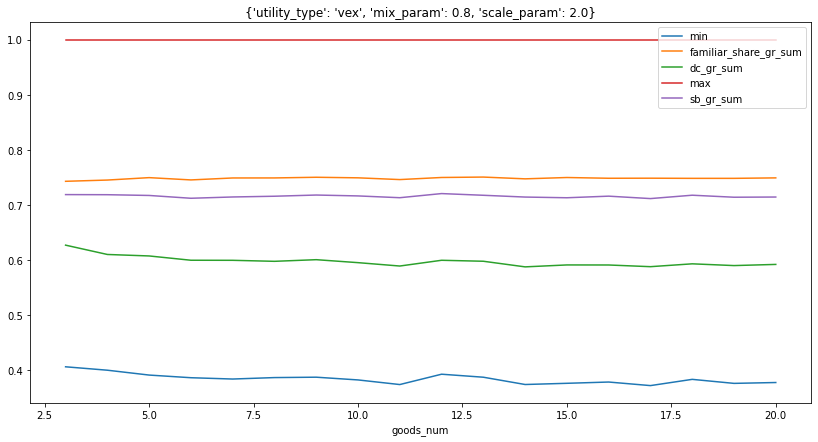

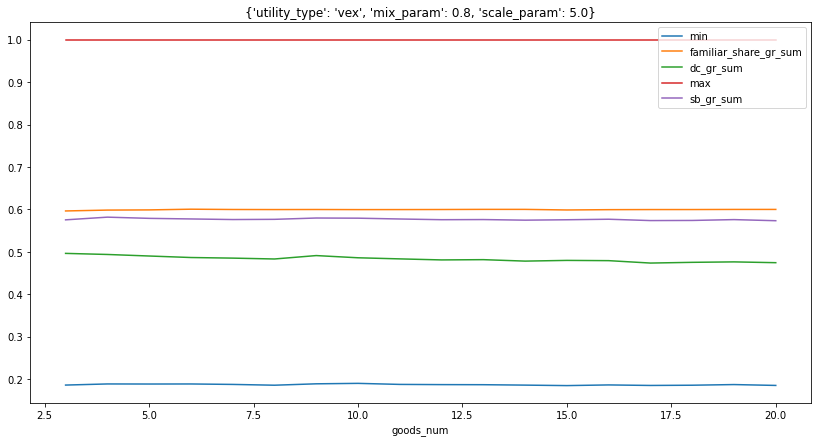

In [15]:
bg_r_data = bg_data.groupby(['utility_type', 'mix_param', 'scale_param', 'goods_num']).mean()
for i in bg_r_data.index.droplevel('goods_num').unique():
    (
        bg_r_data
        .loc[(*i, slice(None))]
        .droplevel(['utility_type', 'mix_param', 'scale_param'])
        .plot(
            figsize=(14, 7), 
            title=str(dict(zip(bg_r_data.index.names[:3], i))), 
            style='-'
        )
    )

In [16]:
sum_guarantees_columns = [
    'dc_gr_sum',
    'familiar_share_gr_sum',
    'max',
    'min',
    'sb_gr_sum',
]
bg_data[bg_data['max'].round(PRECISION) < bg_data[sum_guarantees_columns].max(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [utility_type, min, familiar_share_gr_sum, dc_gr_sum, max, scale_param, goods_num, sb_gr_sum, mix_param]
Index: []

In [17]:
bg_data[bg_data['min'].round(PRECISION) > bg_data[sum_guarantees_columns].min(axis=1).round(PRECISION)]

Empty DataFrame
Columns: [utility_type, min, familiar_share_gr_sum, dc_gr_sum, max, scale_param, goods_num, sb_gr_sum, mix_param]
Index: []

all sum guarantees lies between min and max

### Calculate ratios statistics

In [18]:
bg_ratios = calc_raios(
    bg_data, 
    ('dc_gr_sum','familiar_share_gr_sum', 'sb_gr_sum'), 
    sum_guarantees_columns,
    bg_group_cols
)

In [19]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).mean())

dc_gr_sum/familiar_share_gr_sum  \
mix_param utility_type scale_param goods_num                                    
0.0       cav          1.0         3                                 1.177640   
                                   4                                 1.207867   
                                   5                                 1.210569   
                                   6                                 1.221104   
                                   7                                 1.223758   
                                   8                                 1.229931   
                                   9                                 1.226641   
                                   10                                1.230460   
                                   11                                1.231128   
                                   12                                1.237983   
                                   13                                1.235407   
                                   14                                1.232960   
                                   15                                1.239851   
                                   16                                1.235941   
                                   17                                1.241261   
                                   18                                1.240367   
                                   19                                1.236687   
                                   20                                1.241125   
                       1.5         3                                 1.172786   
                                   4                                 1.198762   
                                   5                                 1.208850   
                                   6                                 1.223048   
                                   7                                 1.220822   
                                   8                                 1.229518   
                                   9                                 1.229306   
                                   10                                1.235086   
                                   11                                1.237957   
                                   12                                1.235097   
                                   13                                1.230740   
                                   14                                1.232136   
                                   15                                1.240593   
                                   16                                1.237902   
                                   17                                1.241367   
                                   18                                1.240138   
                                   19                                1.238398   
                                   20                                1.237190   
                       2.0         3                                 1.179677   
                                   4                                 1.213496   
                                   5                                 1.203067   
                                   6                                 1.220590   
                                   7                                 1.222243   
                                   8                                 1.214446   
                                   9                                 1.228014   
                                   10                                1.226134   
                                   11                                1.227532   
                                   12                                1.235783   
                                   13                                1.237376   
                                   14                                1.236101

In [20]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).var())

dc_gr_sum/familiar_share_gr_sum  \
mix_param utility_type scale_param goods_num                                    
0.0       cav          1.0         3                                 0.004726   
                                   4                                 0.005003   
                                   5                                 0.003420   
                                   6                                 0.003114   
                                   7                                 0.002511   
                                   8                                 0.002369   
                                   9                                 0.001959   
                                   10                                0.001913   
                                   11                                0.002117   
                                   12                                0.001927   
                                   13                                0.001259   
                                   14                                0.001528   
                                   15                                0.001206   
                                   16                                0.001134   
                                   17                                0.001105   
                                   18                                0.000939   
                                   19                                0.001338   
                                   20                                0.001071   
                       1.5         3                                 0.004619   
                                   4                                 0.003552   
                                   5                                 0.003522   
                                   6                                 0.002644   
                                   7                                 0.002669   
                                   8                                 0.002104   
                                   9                                 0.002779   
                                   10                                0.002199   
                                   11                                0.001576   
                                   12                                0.001337   
                                   13                                0.001422   
                                   14                                0.001335   
                                   15                                0.001341   
                                   16                                0.001419   
                                   17                                0.001194   
                                   18                                0.001127   
                                   19                                0.000880   
                                   20                                0.000861   
                       2.0         3                                 0.005150   
                                   4                                 0.005694   
                                   5                                 0.003567   
                                   6                                 0.003676   
                                   7                                 0.003113   
                                   8                                 0.002160   
                                   9                                 0.003436   
                                   10                                0.002302   
                                   11                                0.002252   
                                   12                                0.001670   
                                   13                                0.001533   
                                   14                                0.001744